In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Dataset_Intern.xlsx')

In [ ]:
X=df.drop(columns='CO Conversion')

In [ ]:
y=df[['CO Conversion']]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
seed = 42
np.random.seed(seed)
tensorflow.random.set_seed(seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.fit_transform(Xtest)
#ytrain = ss.fit_transform(ytrain)
#ytest = ss.fit_transform(ytest)

In [ ]:
model=Sequential()
model.add(Dense(units=27,activation='relu'))
model.add(Dense(units=27,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(Xtrain,ytrain,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
98/98 [==============================] - 0s 2ms/step - loss: 250.1414
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 248.7789
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 249.6640
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 247.6896
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 249.0232
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 248.7994
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 248.2303
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 248.1623
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 247.2137
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 248.3400
Epoch 11/100
98/98 [==============================] - 0s 2ms/step - loss: 246.5774
Epoch 12/100
98/98 [==============================] - 0s 2ms/step - loss: 247.1304
Epoch 13/100


In [ ]:
ypred=model.predict(Xtest)

33/33 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(ytest,ypred) #without

0.671259485473352

In [ ]:
mean_squared_error(ytest,ypred)

357.02087765352326

In [ ]:
# optimization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1
model = Sequential()
model.add(Dense(units=27, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=27, activation='tanh',kernel_regularizer=l2(0.001)))
model.add(Dense(units=1))
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(Xtrain,ytrain,epochs=200,batch_size=32,verbose=1)
ypred=model.predict(Xtest)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(ytest,ypred)

Epoch 1/200
98/98 [==============================] - 1s 2ms/step - loss: 1956.6127
Epoch 2/200
98/98 [==============================] - 0s 2ms/step - loss: 1322.2893
Epoch 3/200
98/98 [==============================] - 0s 2ms/step - loss: 1055.3480
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 834.7682
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 695.5516
Epoch 6/200
98/98 [==============================] - 0s 2ms/step - loss: 621.5553
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 574.2330
Epoch 8/200
98/98 [==============================] - 0s 3ms/step - loss: 542.6486
Epoch 9/200
98/98 [==============================] - 0s 3ms/step - loss: 519.6481
Epoch 10/200
98/98 [==============================] - 0s 3ms/step - loss: 502.7975
Epoch 11/200
98/98 [==============================] - 0s 3ms/step - loss: 486.4742
Epoch 12/200
98/98 [==============================] - 0s 3ms/step - loss: 477.8706
Epoch 13/2

0.7354588610954009

In [ ]:
mean_squared_error(ytest,ypred)

287.2986608394646

Text(0.5, 1.0, 'Actual Values vs Predicted Values for Optimized  ANN Model')

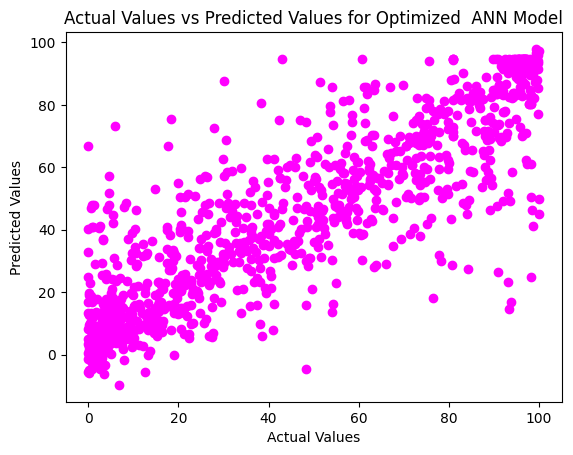

In [ ]:
plt.scatter(ytest, ypred,color='magenta')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values for Optimized  ANN Model')